# Optimization

In this tutorial you will learn to code and use common optimization algorithms for static models.


---

## Profit optimization by a monopolist

A monopolist produces quantity $q$ of goods X at price $p$. Its cost function is $c(q) = 0.5 + q (1-qe^{-q})$

The consumer's demand for price $p$ is $x(p)=2 e^{-0.5 p}$ (constant elasticity of demand to price).

__Write down the profit function of the monopolist and find the optimal production (if any). Don't use any library except for plotting.__



The monopolist chooses the quantity $q$ that maximizes its profit [^footnote] :

$$
\pi(q) = q p(q) - c(q)
$$

(where the inverse demand function is $p(q) = 2 \log(2) - \log(q)$

[^footnote]: here it is obviously equivalent to maximize w.r.t. $p$ or w.r.t. $q$.

In [1]:
import Pkg; Pkg.add("Plots")

using Plots

    Updating registry at `C:\Users\tress\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Manifest.toml`


In [16]:
function Π(q)
    return q*(2*log(2)-log(q)) - (0.5+q*(1-q*exp(-q)))
end

Π (generic function with 1 method)

In [17]:
function Π_prime(q)
    return exp(-q)*q - (exp(-q)*q - exp(-q))*q + (2*log(2) - log(q)) - 2
end

Π_prime (generic function with 1 method)

In [18]:
function Π_second(q)
    return exp(-q)*(q^2 - 4*q + 2) - 1\q
end

Π_second (generic function with 1 method)

In [60]:
function Newton_Raphson(x, Π_prime, Π_second, η, ε; N=1000)
    x_old = x
    x_new = x + 0.5
    n = 0
    while abs(x_new - x_old) > η && abs(Π_prime(x_old)) > ε && n < N
        x_temp = x_new
        x_new = x_old - (Π_prime(x_old))/(Π_second(x_old))
        x_old = x_temp
        n += 1
    end
    print(n)
    return x_new
end

Newton_Raphson (generic function with 1 method)

In [61]:
max = Newton_Raphson(0.5, Π_prime, Π_second, 1e-8, 1e-8)

31

0.8273472311885711

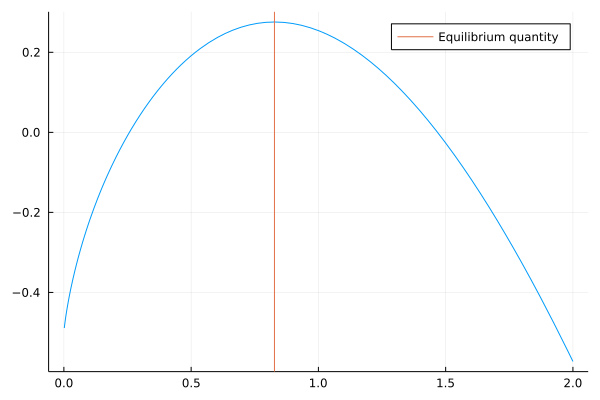

In [69]:
pl = plot()
plot!(pl, Π, 0, 2, label = "")
vline!([max], label = "Equilibrium quantity")

---

## Exercise: constrained optimization

Consider the function $f(x,y) = 1-(x-0.5)^2 -(y-0.3)^2$.

__Use Optim.jl to minimize $f$ without constraint. Check you understand diagnostic information returned by the optimizer.__

In [82]:
import Pkg; Pkg.add("Optim")

using Optim

   Resolving package versions...
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Manifest.toml`


In [92]:
f(x) = (x[1] - 0.5)^2 + (x[2] - 0.3)^2 - 1

f (generic function with 2 methods)

In [106]:
optimize(f, [0.0, 0.0])

 * Status: success

 * Candidate solution
    Final objective value:     -1.000000e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    34
    f(x) calls:    66


In [107]:
optimize(f, [0.0, 0.0]).minimizer

2-element Vector{Float64}:
 0.5000172833186103
 0.2999408484491455

__Now, consider the constraint $x<0.3$ and maximize $f$ under this new constraint.__

In [101]:
lower = [-Inf, -Inf]
upper = [0.3, Inf]
optimize(f, lower, upper, [0.0, 0.0])

 * Status: success

 * Candidate solution
    Final objective value:     -9.600000e-01

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 1.20e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.83e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.20e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    56
    ∇f(x) calls:   56


In [108]:
optimize(f, lower, upper, [0.0, 0.0]).minimizer

2-element Vector{Float64}:
 0.2999999988
 0.2999999999957357

__Reformulate the problem as a root finding with lagrangians. Write the complementarity conditions.__

__Solve using NLSolve.jl__

---

## Consumption optimization

A consumer has preferences $U(c_1, c_2)$ over two consumption goods $c_1$ and $c_2$.

Given a budget $I$, consumer wants to maximize utility subject to the budget constraint $p_1 c_1 + p_2 c_2 \leq I$.

We choose a Stone-Geary specification where

$U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$

__Write the Karush-Kuhn-Tucker necessary conditions for the problem.__

__Verify the KKT conditions are sufficient for optimality.__

__Derive analytically the demand functions, and the shadow price.__

__Interpret this problem as a complementarity problem and solve it using NLSolve.__

__Produce some nice graphs with isoutility curves, the budget constraint and the optimal choice.__

